# Practical 1

The questions were written by Prof. Reza Drikvandi, I only wrote up my solutions to them.

## Question 1.1

Consider a high dimensional problem with $n$ observations $\boldsymbol{X}_1, \ldots, \boldsymbol{X}_n$, with each observation being $p$-dimensional on $p$ variables as $\boldsymbol{X}_i=\left(X_i^{(1)}, \ldots, X_i^{(p)}\right), i=1, \ldots, n$. Suppose that we are interested in investigating the behaviour of all the pairwise distances between observations using the Euclidean distance with $L_2$-norm.

**a)** In R, simulate $n$ i.i.d. observations $\boldsymbol{X}_i$ from this problem with each variable $X_i^{(k)}$ generated from the uniform distribution on $[0,1]$ with $n=100$ and $p=2$, using the $\mathrm{R}$ function runif. Save these into an $n \times p$ matrix of data called $\boldsymbol{X}$ with $n$ observations in rows and $p$ variables in columns.

In [1]:
set.seed(42)

n <- 1000
p <- 2

X <- matrix(runif(n*p, 0, 1), nrow=n, ncol=p)

**b)** Calculate the pairwise distances between all the $n$ observations based on the Euclidean distance, using the R function `dist` applied to the data matrix $\boldsymbol{X}$.

In [2]:
pairwise_dist <- dist(X)

**c)** Plot a histogram of the pairwise distances, using the R function `hist`.

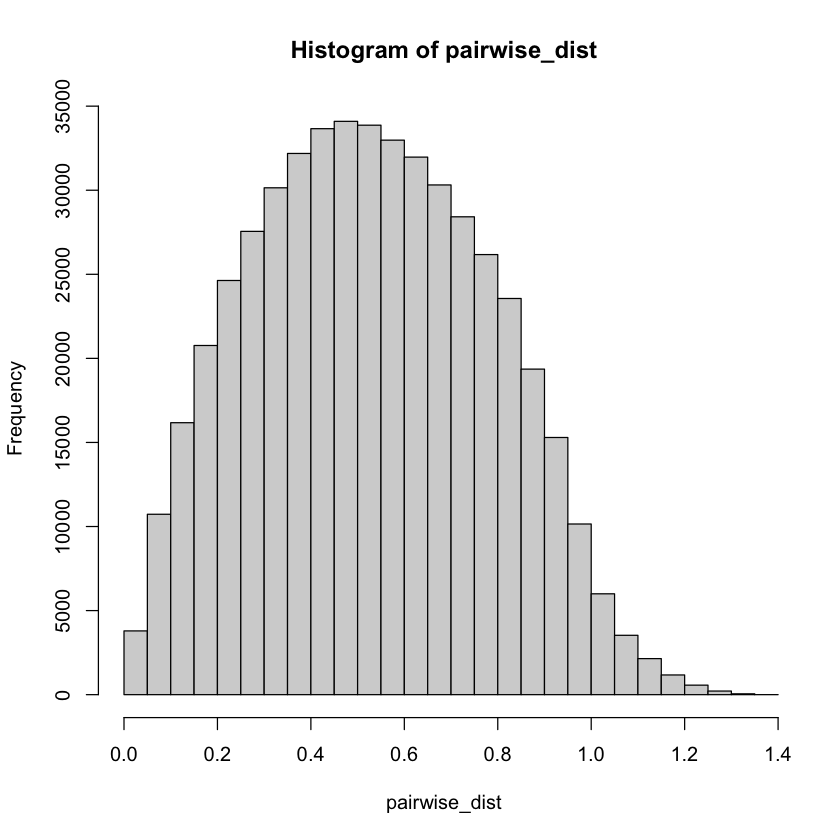

In [3]:
hist(pairwise_dist, xlim=c(0,max(pairwise_dist)))

**d)** Repeat the above steps for $p=10$, $p=100$ and $p=1000$ to show that the distances between observations tend to diverge with $p$.

**$\boldsymbol{p=10}$**

In [4]:
p <- 10
X <- matrix(runif(n*p, 0, 1), nrow=n, ncol=p)

pairwise_dist_p10 <- dist(X)

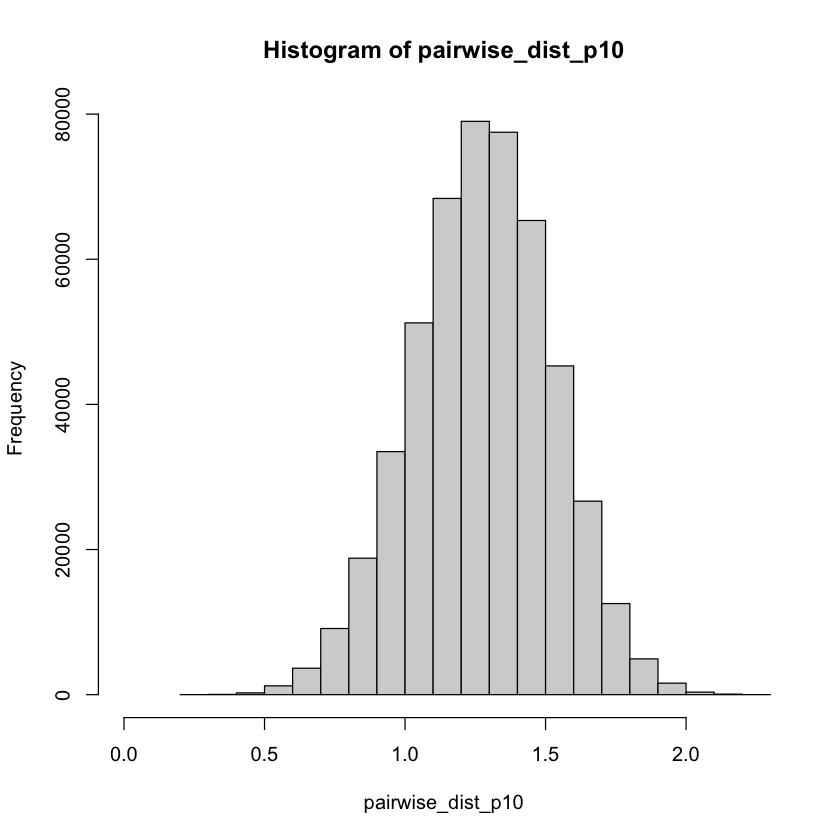

In [5]:
hist(pairwise_dist_p10, xlim=c(0,max(pairwise_dist_p10)))

**$\boldsymbol{p=100}$**

In [6]:
p <- 100
X <- matrix(runif(n*p, 0, 1), nrow=n, ncol=p)

pairwise_dist_p100 <- dist(X)

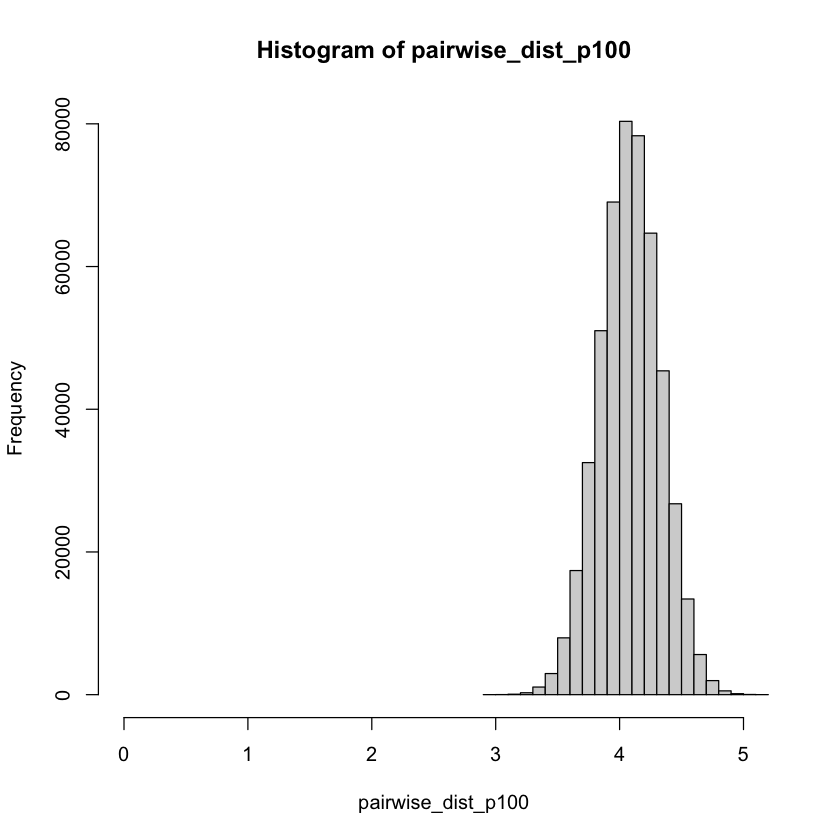

In [7]:
hist(pairwise_dist_p100, xlim=c(0,max(pairwise_dist_p100)))

**$\boldsymbol{p=1000}$**

In [8]:
p <- 1000
X <- matrix(runif(n*p, 0, 1), nrow=n, ncol=p)

pairwise_dist_p1000 <- dist(X)

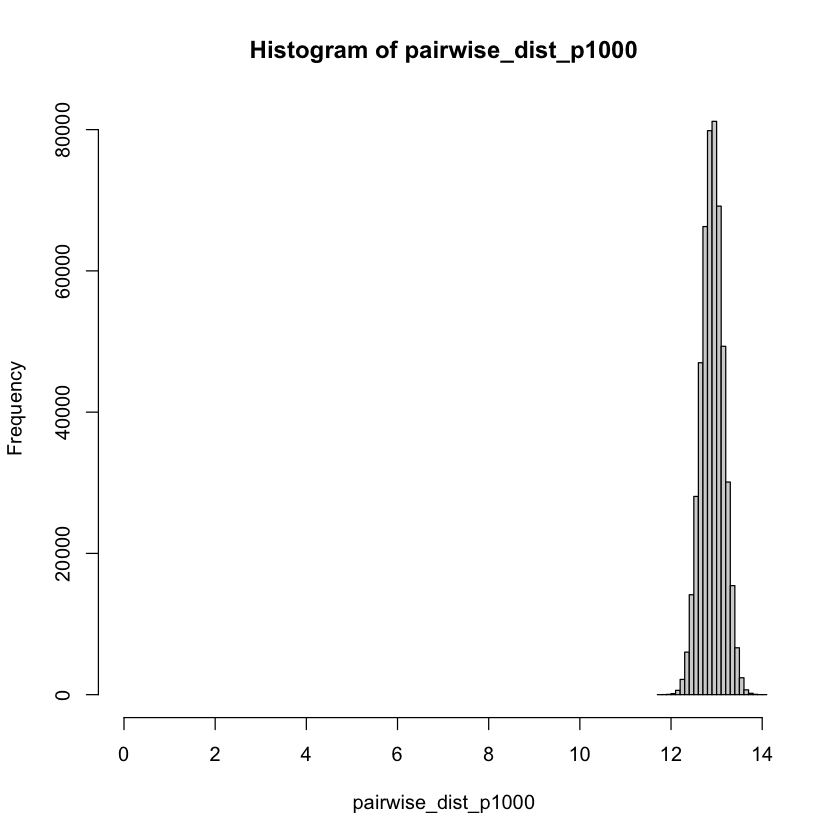

In [9]:
hist(pairwise_dist_p1000, xlim=c(0,max(pairwise_dist_p1000)))

All histograms:

In [10]:
library("ggplot2")

Warning message:
“package ‘ggplot2’ was built under R version 4.1.2”


In [11]:
pairwise_dists = data.frame(
    p10 = as.vector(pairwise_dist_p10),
    p100 = as.vector(pairwise_dist_p100),
    p1000 = as.vector(pairwise_dist_p1000)
)

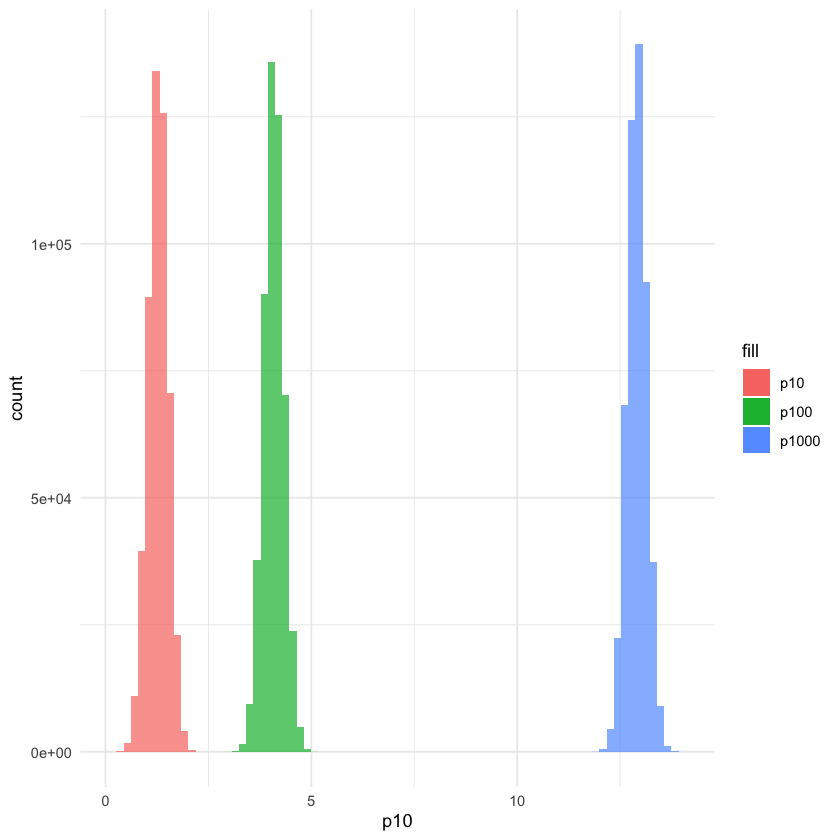

In [12]:
ggplot(pairwise_dists) +
    geom_histogram(bins=80, aes(x = p10, fill='p10'), alpha=0.7) +
    geom_histogram(bins=80, aes(x = p100, fill='p100'), alpha=0.7) +
    geom_histogram(bins=80, aes(x = p1000, fill='p1000'), alpha=0.7) +
    theme_minimal()

We can see as $p$ gets larger, the distances diverge.

**e)** Repeat the above analysis with the modified Euclidean distance, which is the Euclidean distance scaled by $p^{-1 / 2}$. Is there any improvement?

In [13]:
p <- 10
pairwise_dist_p10_scaled <- pairwise_dist_p10 * (p^(-0.5))

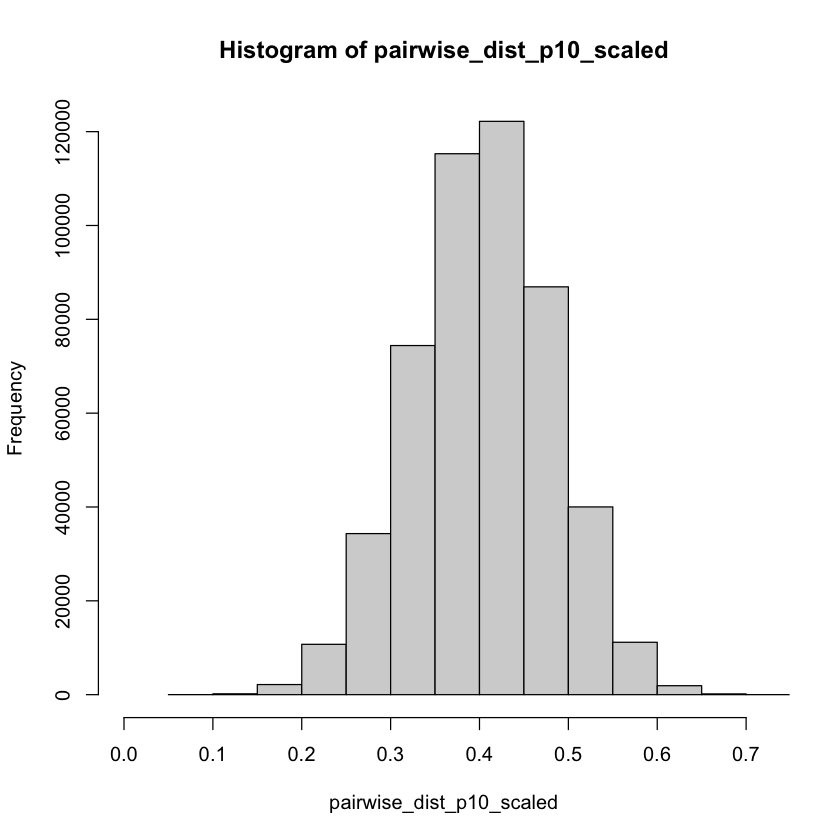

In [14]:
hist(pairwise_dist_p10_scaled, xlim=c(0,max(pairwise_dist_p10_scaled)))

In [15]:
p <- 100
pairwise_dist_p100_scaled <- pairwise_dist_p100 * (p^(-0.5))

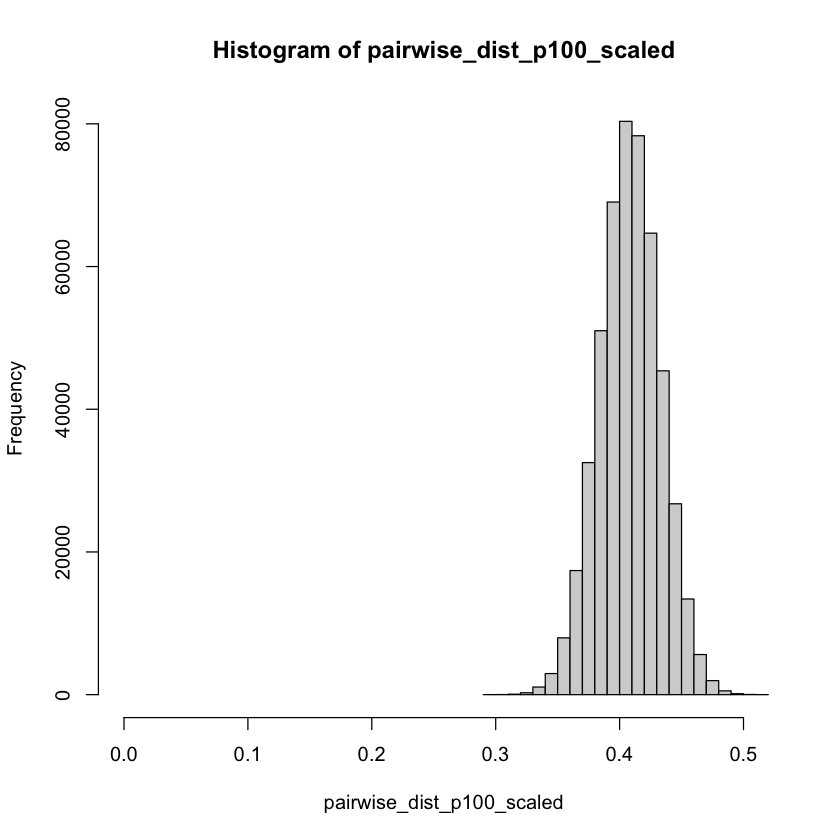

In [16]:
hist(pairwise_dist_p100_scaled, xlim=c(0,max(pairwise_dist_p100_scaled)))

In [17]:
p <- 1000
pairwise_dist_p1000_scaled <- pairwise_dist_p1000 * (p^(-0.5))

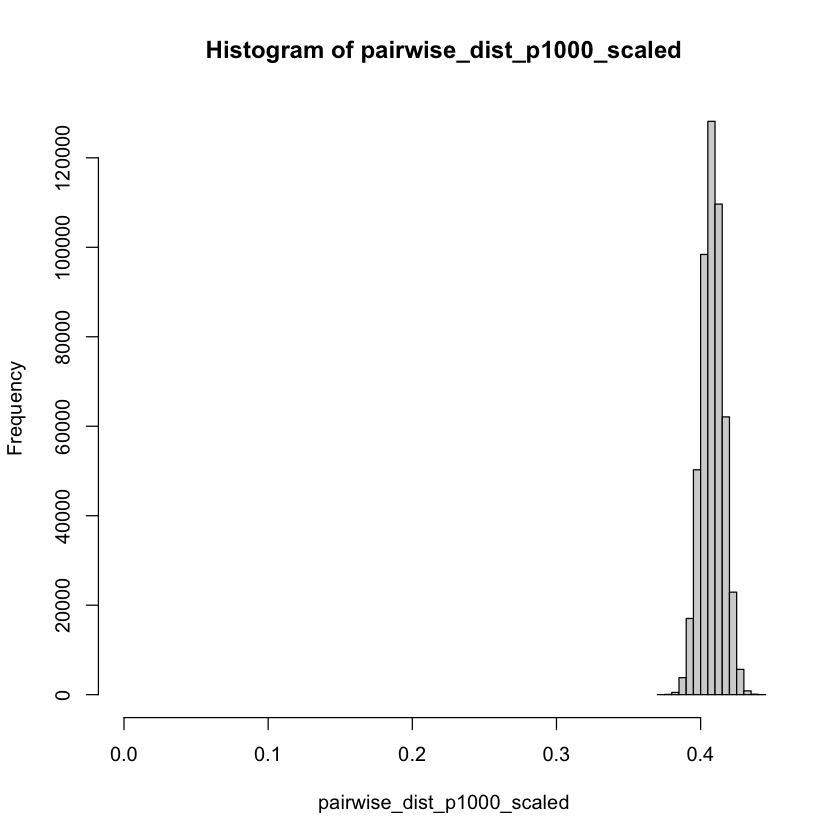

In [18]:
hist(pairwise_dist_p1000_scaled, xlim=c(0,max(pairwise_dist_p1000_scaled)))

In [19]:
pairwise_dists_scaled = data.frame(
    p10 = as.vector(pairwise_dist_p10_scaled),
    p100 = as.vector(pairwise_dist_p100_scaled),
    p1000 = as.vector(pairwise_dist_p1000_scaled)
)

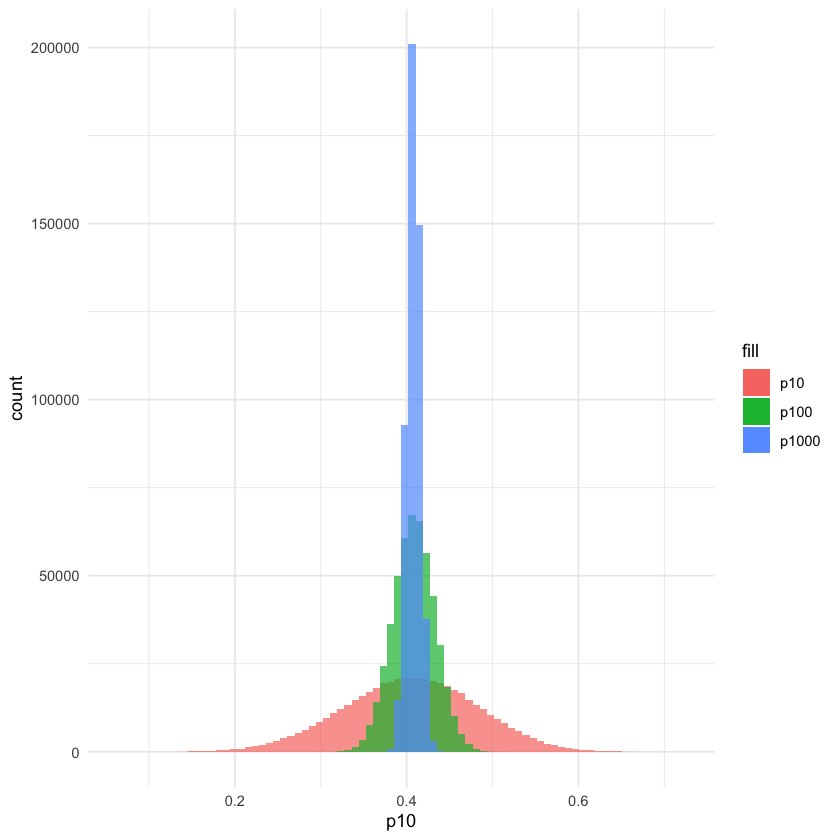

In [20]:
ggplot(pairwise_dists_scaled) +
    geom_histogram(bins=80, aes(x = p10, fill='p10'), alpha=0.7) +
    geom_histogram(bins=80, aes(x = p100, fill='p100'), alpha=0.7) +
    geom_histogram(bins=80, aes(x = p1000, fill='p1000'), alpha=0.7) +
    theme_minimal()

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


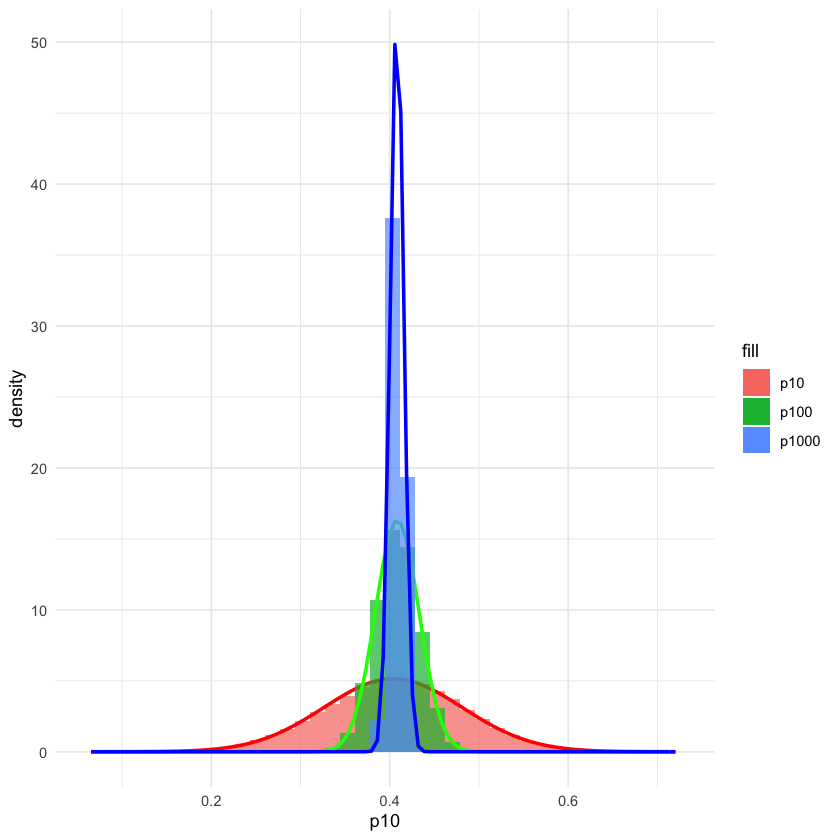

In [21]:
ggplot(pairwise_dists_scaled) +
    geom_histogram(bins=40, aes(x = p10, y = ..density.., fill='p10'), alpha=0.7) +
    stat_function(fun = dnorm, args = list(mean = mean(pairwise_dists_scaled$p10, na.rm = TRUE), 
                                           sd = sd(pairwise_dists_scaled$p10, na.rm = TRUE)), 
                  color = "red", linewidth = 1) +
    geom_histogram(bins=40, aes(x = p100, y = ..density.., fill='p100'), alpha=0.7) +
    stat_function(fun = dnorm, args = list(mean = mean(pairwise_dists_scaled$p100, na.rm = TRUE), 
                                           sd = sd(pairwise_dists_scaled$p100, na.rm = TRUE)), 
                  color = "green", linewidth = 1) +
    geom_histogram(bins=40, aes(x = p1000, y = ..density.., fill='p1000'), alpha=0.7) +
    stat_function(fun = dnorm, args = list(mean = mean(pairwise_dists_scaled$p1000, na.rm = TRUE), 
                                           sd = sd(pairwise_dists_scaled$p1000, na.rm = TRUE)), 
                  color = "blue", linewidth = 1) +
    theme_minimal()


With the scaling, they stay centered at the same point, but the distribution still becomes narrower.

## Question 1.2

This question aims to examine the performance of the ordinary least squares (OLS) estimator in regression analysis when the dimension $p$ gets larger. It is difficult to give a direct picture of a linear regression with dimension $p$ larger than 2 , however this can be illustrated using the following formulation. Suppose that the $p$-dimensional covariates $\boldsymbol{X}_i$ are given by $\boldsymbol{X}_i=h(i / n)$, where $h:[0,1] \rightarrow \mathbb{R}^p$ is a vector-valued function defined as $h(t)=[3 \sin (-\pi j t)]_{j=1, \ldots, p}$. Consider the regression model
$$
Y_i=\sum_{j=1}^p 3 \beta_j \sin (-\pi j i / n)+\varepsilon_i=\boldsymbol{X}_i^T \boldsymbol{\beta}+\varepsilon_i, \quad i=1, \ldots, n \tag{1}
$$
with $\boldsymbol{\beta}=\left(\beta_1, \ldots, \beta_p\right)$. Note that we can equivalently rewrite this regression model as $Y_i=f_\beta(i / n)+\varepsilon_i$ where $f_\beta\left(t_i\right)=\sum_{j=1}^p 3 \beta_j \sin \left(-\pi j t_i\right)\left(\right.$ note that $\left.t_i=i / n\right)$.


**a)** In R, simulate a random sample from regression model (1) with $n=100$ and $p=2$. To do this, first simulate random errors $\varepsilon_1, \ldots, \varepsilon_n$ from the standard normal distribution $N\left(0, \sigma^2=1\right)$ and also simulate the parameters $\beta_j$ from the normal distribution $N\left(0, j^{-4}\right)$, both using the R function `rnorm`. Then, calculate the simulated response values $Y_i$ using the formula in regression model (1).

In [22]:
p <- 2
n <- 100
sd <- 1

# simulate error
eps <- rnorm(n, mean=0, sd=sd)

# simulate coefficients - note sd given not variance
beta <- sapply(1:p, function(j) rnorm(1, mean = 0, sd = j^(-2)))

X <- outer(1:n, 1:p, function(i, j) 3*sin(-pi * j * i / n))

# compute Y
Y <- X %*% beta + eps

**b)** Fit the regression model (1) with no intercept to the simulated data in Part (a), using the $\mathrm{R}$ function `lm`. Extract the OLS estimates of the coefficients $\beta_j$ from this fitted model and denote them by $\hat{\beta}_j$.

In [23]:
LS <- lm(Y~ -1+X) # -1 specifies no intercept
summary(LS)


Call:
lm(formula = Y ~ -1 + X)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3394 -0.7250  0.0778  0.9102  2.6610 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
X1  0.618732   0.054021  11.453   <2e-16 ***
X2 -0.004204   0.054021  -0.078    0.938    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.146 on 98 degrees of freedom
Multiple R-squared:  0.5724,	Adjusted R-squared:  0.5637 
F-statistic: 65.59 on 2 and 98 DF,  p-value: < 2.2e-16


In [24]:
beta_hat <- LS$coefficients

**c)** Using R, calculate the estimated response values $\hat{Y}_i$ using the OLS estimates $\hat{\beta}_j$ as follows
$$\hat{Y}_i=\sum_{j=1}^p 3 \hat{\beta}_j \sin (-\pi j i / n), \quad i=1, \ldots, n$$

In [25]:
Yhat <- X %*% beta_hat

**d)** Using R, calculate the true response values $Y_i^{\text {true }}$ (noise free or without random errors) using the true parameter values $\beta_j$ simulated in Part (a) as follows
$$Y_i^{\text {true }}=\sum_{j=1}^p 3 \beta_j \sin (-\pi j i / n), \quad i=1, \ldots, n$$

In [26]:
Ytrue <- X %*% beta

**e)** Plot the observed or simulated response values $Y_i$ in Part (a) versus $t_i=i / n$ where $i=1, \ldots, n$, using the R function `plot`.

**f)** Add the true regression curve (signal) to the plot, using the R function `points`.

**g)** Add the fitted least square regression curve in Part (b) to this plot, using the R function `points`.

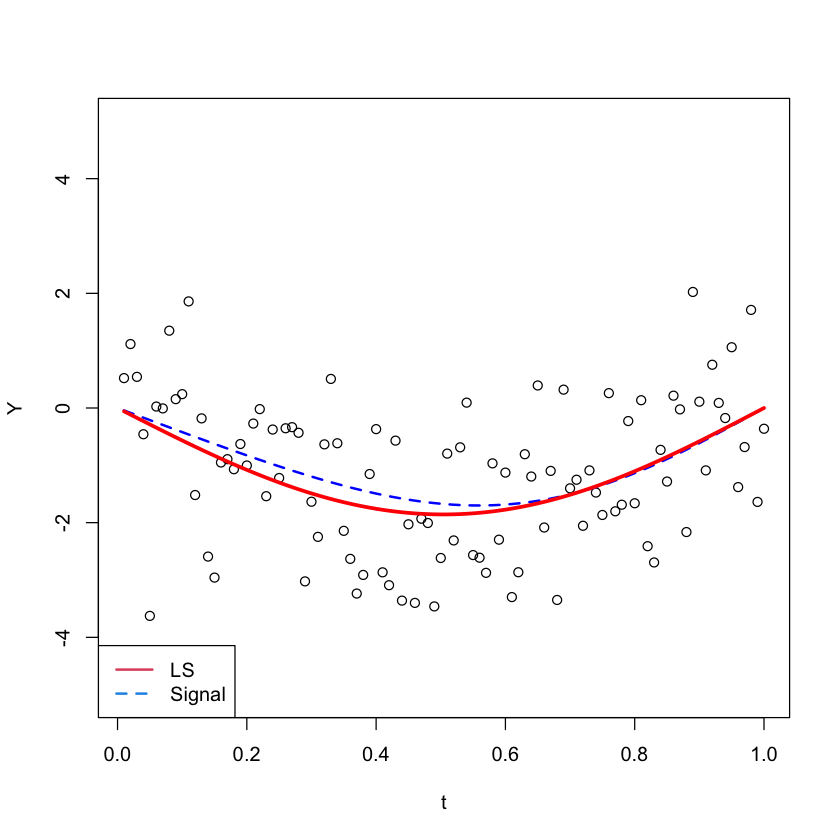

In [27]:
t <- (1:n)/n

plot(x=t, y=Y, ylim=c(-5,5))
points(x=t, y=Ytrue, type="l", lty=2, lwd=2, col="blue")
points (x=t, y=Yhat, type="l", lty=1, lwd=3, col="red")

legend(x="bottomleft", legend=c("LS","Signal"), 7,
       lty=c(1, 2), col=c(2, 4), lwd=2)

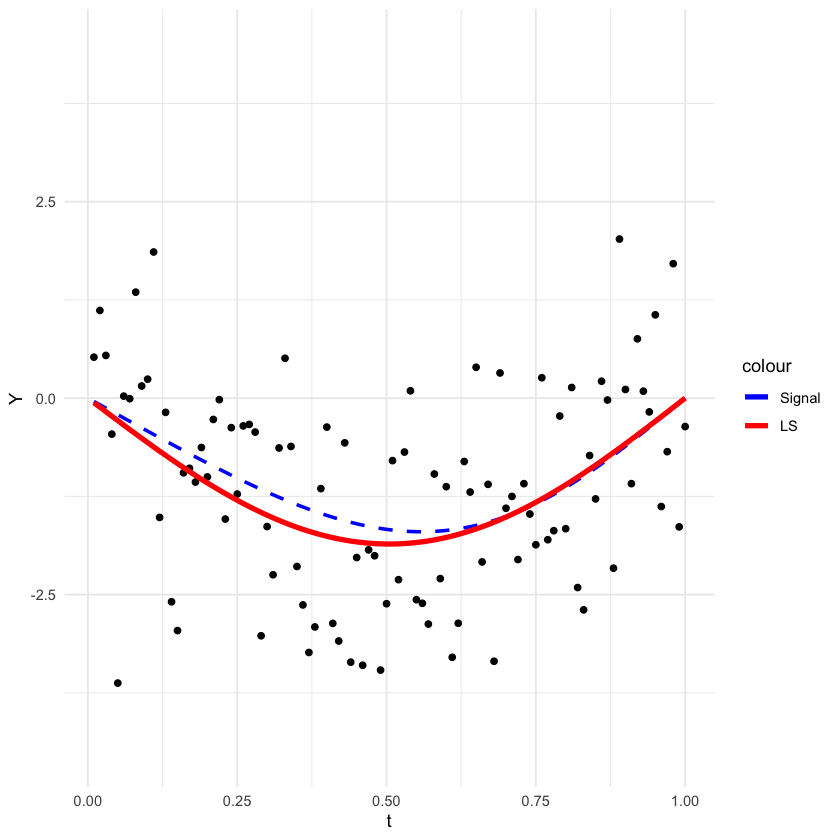

In [28]:
ggplot(data.frame(t=t, Y=Y, Ytrue=Ytrue, Yhat=Yhat), aes(x = t, y = Y)) +
  geom_point() +
  geom_line(aes(y = Ytrue, color = "blue_line"), linetype = "dashed", linewidth = 1) + 
  geom_line(aes(y = Yhat, color = "red_line"), linetype = "solid", linewidth = 1.5) + 
  scale_color_manual(values = c("blue_line" = "blue", "red_line" = "red"), 
                     labels = c("Signal", "LS")) + 
  ylim(-4.5, 4.5) +
  xlab("t") +
  ylab("Y") +
  theme_minimal()

**h)** Repeat the above steps for $p=10, p=50$ and $p=100$. Show that the mean squared error of the OLS method increases as the dimension $p$ gets larger, by comparing the resulting plots for the increasing values of $p$. This supports the theory that $\|\hat{\boldsymbol{\beta}}-\boldsymbol{\beta}\| \approx p \sigma^2$, as shown in the lecture notes.

We first want to wrap this functionality in a function to reuse.

In [29]:
plot_regression <- function(n, p, sd=1){
    # simulate error
    eps <- rnorm(n, mean=0, sd=sd)

    # simulate coefficients - note sd given not variance
    beta <- sapply(1:p, function(j) rnorm(1, mean = 0, sd = j^(-2)))

    X <- outer(1:n, 1:p, function(i, j) 3*sin(-pi * j * i / n))

    # compute Y
    Y <- X %*% beta + eps
               
    # LS model
    LS <- lm(Y~ -1+X)
    
    beta_hat <- LS$coefficients
    Yhat <- X %*% beta_hat
    Ytrue <- X %*% beta
               
    t <- (1:n)/n
    
    # Plots
    plot(x=t, y=Y, ylim=c(-6,6), main=bquote(p == .(p)))
    points(x=t, y=Ytrue, type="l", lty=2, lwd=2, col="blue")
    points (x=t, y=Yhat, type="l", lty=1, lwd=3, col="red")

    legend(x="bottomleft", legend=c("LS","Signal"), 7,
           lty=c(1, 2), col=c(2, 4), lwd=2)
}

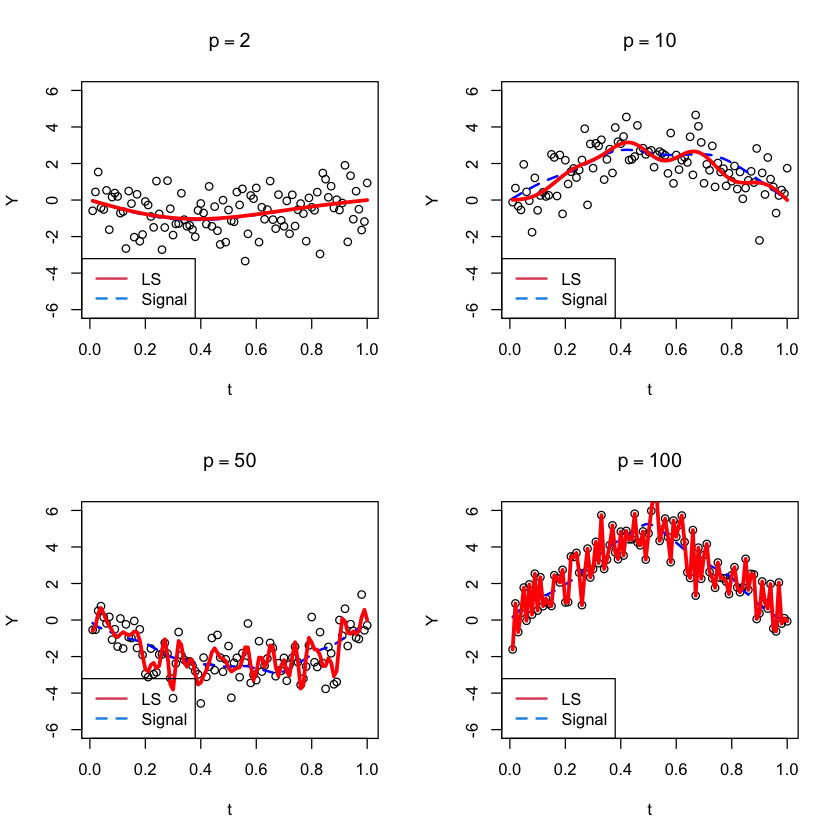

In [30]:
par(mfrow = c(2, 2))

for (p in c(2, 10, 50, 100)){
    plot_regression(n=100, p=p)
}

We can see that as $p$ increases, the line stickc to the points. For $p=100$, it perfectly interpolates through all the points which is clearly overfitting.

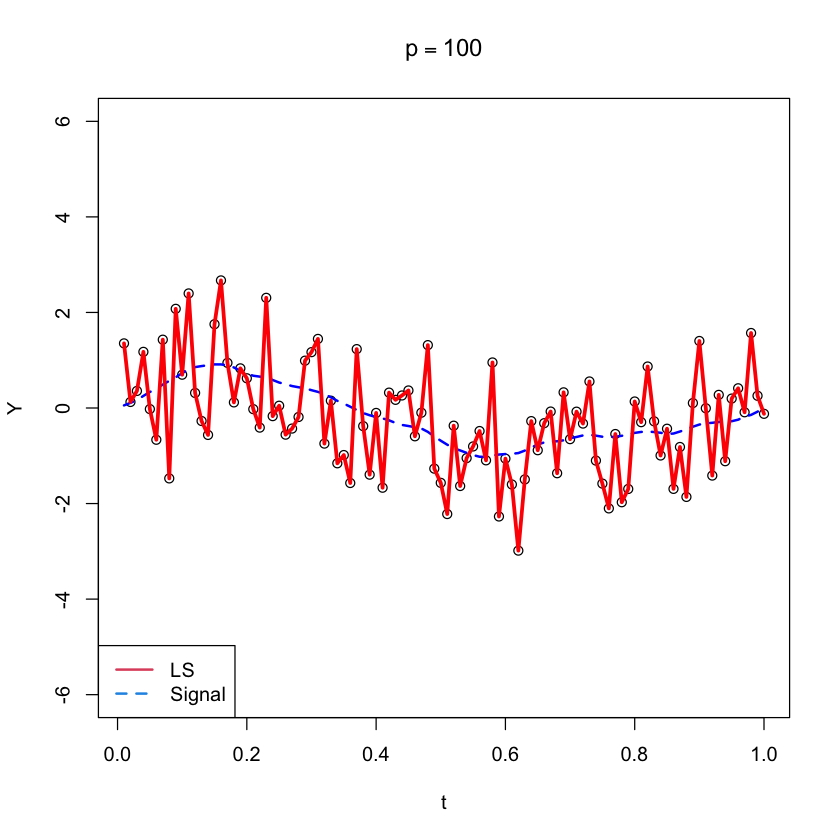

In [31]:
plot_regression(n=100, p=100)

**i)** What happens if we use $p=101$ or larger such as $p=200$?

OLS method fails to work since $p > n$.

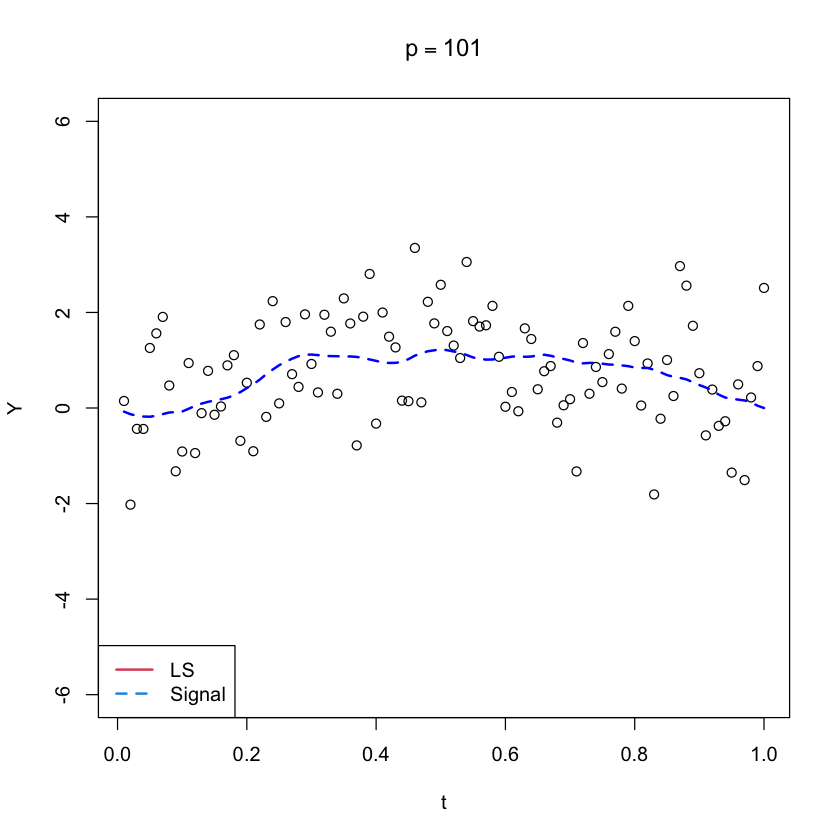

In [32]:
plot_regression(n=100, p=101)

In [33]:
# In detail, we can see how it fails looking at smaller n and p 
n <- 10
p <- 11

eps <- rnorm(n, mean=0, sd=sd)
beta <- sapply(1:p, function(j) rnorm(1, mean = 0, sd = j^(-2)))
X <- outer(1:n, 1:p, function(i, j) 3*sin(-pi * j * i / n))
Y <- X %*% beta + eps

LS <- lm(Y~ -1+X)

summary(LS)


Call:
lm(formula = Y ~ -1 + X)

Residuals:
ALL 10 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
      Estimate Std. Error t value Pr(>|t|)
X1   1.809e+00        NaN     NaN      NaN
X2   3.666e-01        NaN     NaN      NaN
X3  -3.343e-01        NaN     NaN      NaN
X4  -9.945e-02        NaN     NaN      NaN
X5   6.960e-02        NaN     NaN      NaN
X6  -2.565e-02        NaN     NaN      NaN
X7  -4.562e-02        NaN     NaN      NaN
X8   1.324e-01        NaN     NaN      NaN
X9  -4.251e-01        NaN     NaN      NaN
X10  3.520e+14        NaN     NaN      NaN
X11         NA         NA      NA       NA

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 10 and 0 DF,  p-value: NA
